<a href="https://colab.research.google.com/github/Himanshu-Meshram/Projects/blob/Laptop-Price-Prediction/L_P_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**


In [1]:
import pandas as pd
import numpy as np
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
print(sklearn.__version__)
!pip install streamlit

1.6.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 98.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.1 MB/s eta 0:00:00


# **Data Analysis and Cleaning**

In [2]:
df= pd.read_csv('/content/laptop_prices.csv')
# df
df.columns
# df.shape
# df.describe()

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

In [3]:
df.dtypes

,0
Company,object
Product,object
TypeName,object
Inches,float64
Ram,int64
OS,object
Weight,float64
Price_euros,float64
Screen,object
ScreenW,int64


In [4]:
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

In [5]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int32  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float32
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

# **Exploratory Data Analysis - EDA**

<ipython-input-6-2073861339>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price_euros'])


<Axes: xlabel='Price_euros', ylabel='Density'>

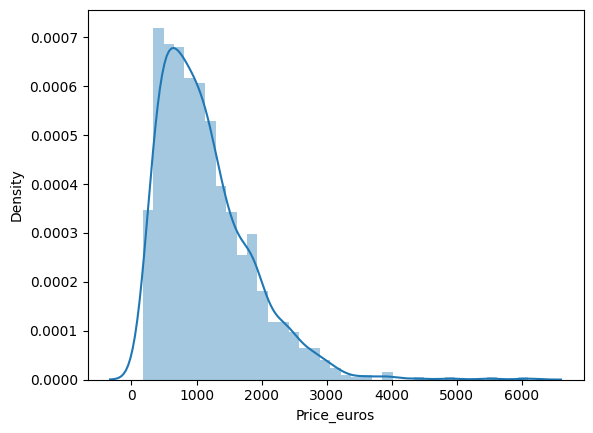

In [6]:
sns.distplot(df['Price_euros'])

<Axes: xlabel='Company'>

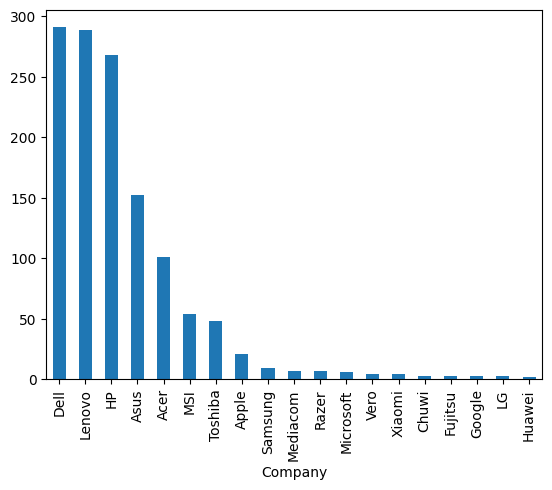

In [7]:
df['Company'].value_counts().plot(kind='bar')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

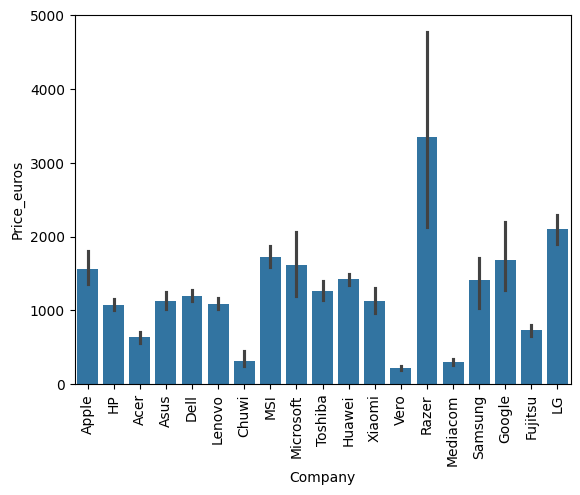

In [8]:
sns.barplot(x=df['Company'],y=df['Price_euros'])
plt.xticks(rotation='vertical')

<Axes: xlabel='TypeName'>

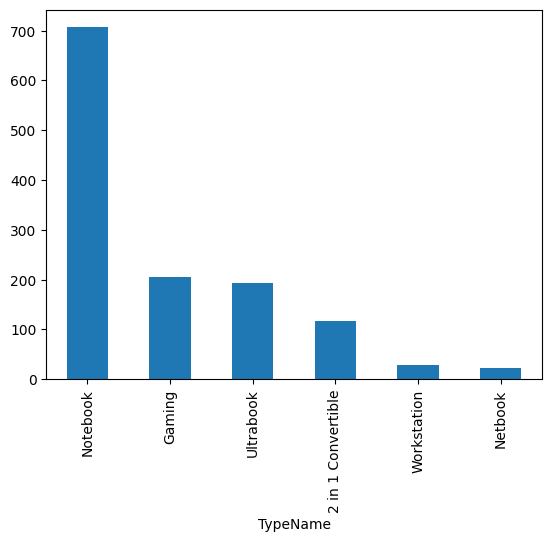

In [9]:
df['TypeName'].value_counts().plot(kind='bar')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

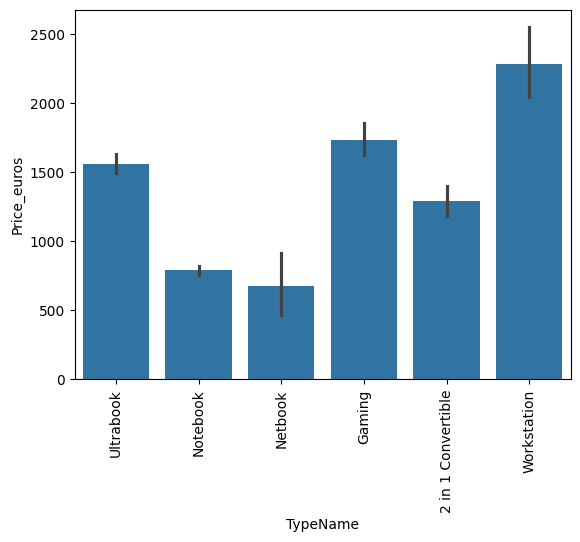

In [10]:
 sns.barplot(x=df['TypeName'],y=df['Price_euros'])
 plt.xticks(rotation='vertical')

<ipython-input-11-1439577752>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

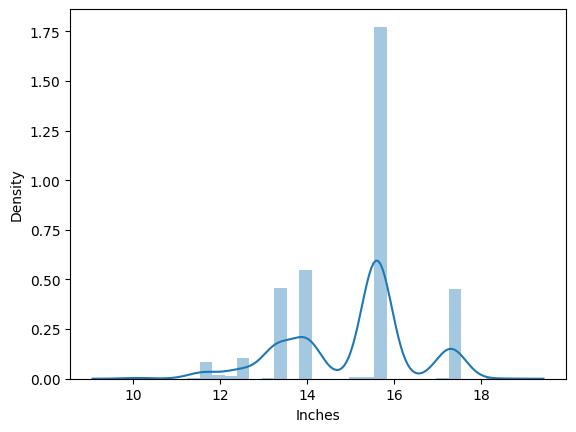

In [11]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price_euros'>

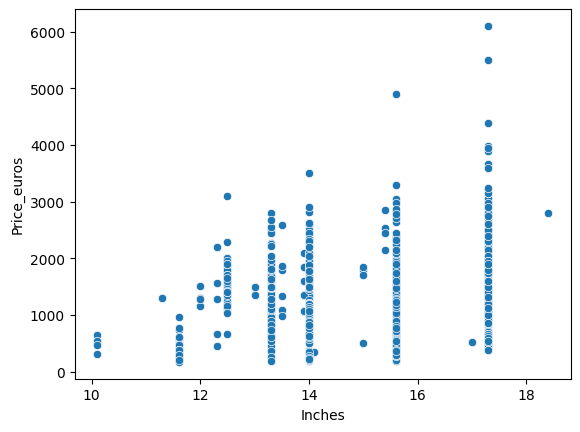

In [12]:
sns.scatterplot(x=df['Inches'],y=df['Price_euros'])


In [13]:
df['Screen'].value_counts()

,count
Screen,
Full HD,835
Standard,369
4K Ultra HD,43
Quad HD+,28


<Axes: xlabel='Touchscreen', ylabel='Price_euros'>

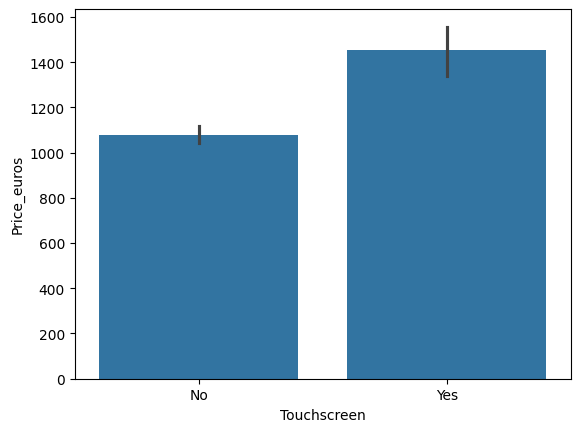

In [14]:
sns.barplot(x=df['Touchscreen'],y=df['Price_euros'])

<Axes: xlabel='IPSpanel'>

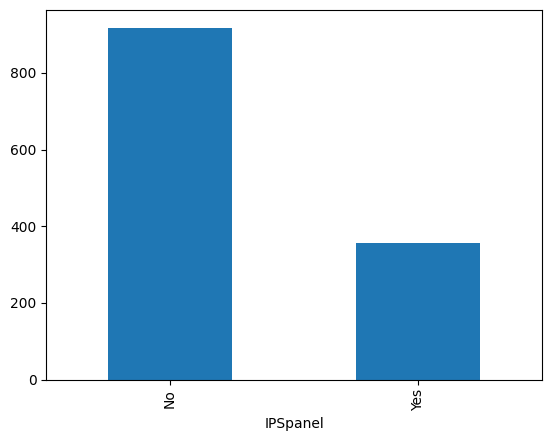

In [15]:
df['IPSpanel'].value_counts().plot(kind='bar')

<Axes: xlabel='IPSpanel', ylabel='Price_euros'>

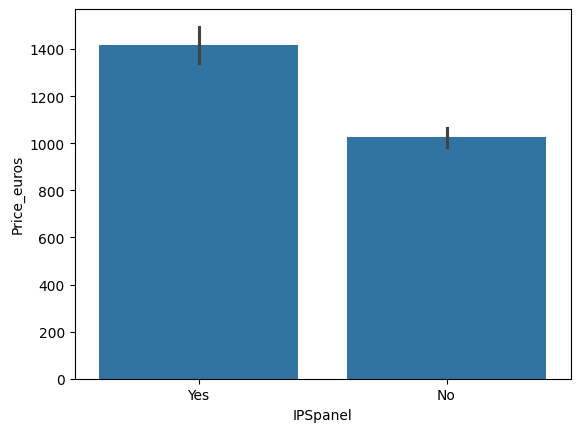

In [16]:
sns.barplot(x=df['IPSpanel'],y=df['Price_euros'])

In [17]:
df.corr(numeric_only=True)['Price_euros']

,Price_euros
Inches,0.066608
Ram,0.740287
Weight,0.211883
Price_euros,1.000000
ScreenW,0.552491
ScreenH,0.548529
CPU_freq,0.428847
PrimaryStorage,-0.124775
SecondaryStorage,0.291207


In [18]:
df['PPI'] = ((df['ScreenW']**2 + df['ScreenH']**2)**0.5/df['Inches']).astype('float')   ## PIXEL-PER-INCHES(PPI) [under-root(screen-width^2+height^2)/inches]
df.corr(numeric_only=True)['Price_euros']

,Price_euros
Inches,0.066608
Ram,0.740287
Weight,0.211883
Price_euros,1.000000
ScreenW,0.552491
ScreenH,0.548529
CPU_freq,0.428847
PrimaryStorage,-0.124775
SecondaryStorage,0.291207
PPI,0.470032


In [19]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,PPI
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640,226.983005
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000,127.677940
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620,141.211998
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455,220.534624
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650,226.983005


In [20]:
df.drop(columns=['ScreenH','ScreenW'],inplace=True)

In [21]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,Touchscreen,...,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,PPI
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,No,...,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640,226.983005
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,No,...,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000,127.677940
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,No,...,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620,141.211998
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,No,...,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455,220.534624
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,No,...,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650,226.983005


In [22]:
df['CPU_brand'] = df['CPU_company'] + [' '] + df['CPU_model']

In [23]:
df['CPU_brand'] = df['CPU_brand'].apply(lambda x:" ".join(x.split()[0:3]))

In [24]:
def fetch_processor(text):
  if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
    return text
  else:
    if text.split()[0] == 'Intel':
      return 'Other Intel Processors'
    else:
      return 'Return Processor'

In [25]:
df['CPU'] = df['CPU_brand'].apply(fetch_processor)

In [26]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,Touchscreen,...,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,PPI,CPU_brand,CPU
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,No,...,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640,226.983005,Intel Core i5,Intel Core i5
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,No,...,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000,127.677940,Intel Core i5,Intel Core i5
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,No,...,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620,141.211998,Intel Core i5,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,No,...,Core i7,512,0,SSD,No,AMD,Radeon Pro 455,220.534624,Intel Core i7,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,No,...,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650,226.983005,Intel Core i5,Intel Core i5


In [27]:
df.drop(columns=['CPU_freq'],inplace=True)

In [28]:
df.head(20)


,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,Touchscreen,...,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,PPI,CPU_brand,CPU
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,No,...,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640,226.983005,Intel Core i5,Intel Core i5
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,No,...,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000,127.677940,Intel Core i5,Intel Core i5
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,No,...,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620,141.211998,Intel Core i5,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,No,...,Core i7,512,0,SSD,No,AMD,Radeon Pro 455,220.534624,Intel Core i7,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,No,...,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650,226.983005,Intel Core i5,Intel Core i5
5,Acer,Aspire 3,Notebook,15.6,4,Windows 10,2.10,400.00,Standard,No,...,A9-Series 9420,500,0,HDD,No,AMD,Radeon R5,100.454670,AMD A9-Series 9420,Return Processor
6,Apple,MacBook Pro,Ultrabook,15.4,16,Mac OS X,2.04,2139.97,Standard,No,...,Core i7,256,0,Flash Storage,No,Intel,Iris Pro Graphics,220.534624,Intel Core i7,Intel Core i7
7,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,1158.70,Standard,No,...,Core i5,256,0,Flash Storage,No,Intel,HD Graphics 6000,127.677940,Intel Core i5,Intel Core i5
8,Asus,ZenBook UX430UN,Ultrabook,14.0,16,Windows 10,1.30,1495.00,Full HD,No,...,Core i7 8550U,512,0,SSD,No,Nvidia,GeForce MX150,157.350512,Intel Core i7,Intel Core i7
9,Acer,Swift 3,Ultrabook,14.0,8,Windows 10,1.60,770.00,Full HD,No,...,Core i5 8250U,256,0,SSD,No,Intel,UHD Graphics 620,157.350512,Intel Core i5,Intel Core i5


<Axes: xlabel='CPU'>

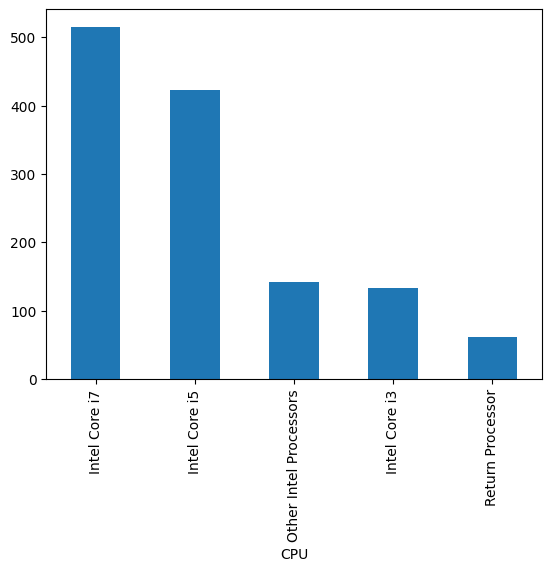

In [29]:
df['CPU'].value_counts().plot(kind='bar')

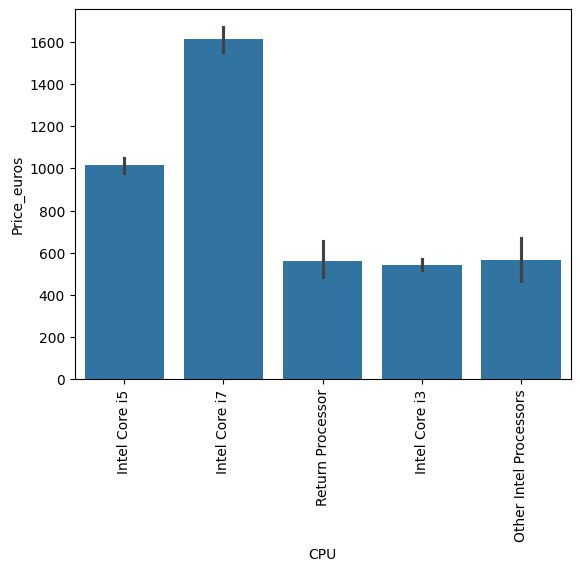

In [30]:
sns.barplot(x=df['CPU'],y=df['Price_euros'])
plt.xticks(rotation = 'vertical')
plt.show()

In [31]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'Touchscreen', 'IPSpanel', 'RetinaDisplay',
       'CPU_company', 'CPU_model', 'PrimaryStorage', 'SecondaryStorage',
       'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company',
       'GPU_model', 'PPI', 'CPU_brand', 'CPU'],
      dtype='object')

In [32]:
df.drop(columns=['CPU_company','CPU_model','CPU_brand'],inplace=True)

In [33]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,Touchscreen,IPSpanel,RetinaDisplay,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,PPI,CPU
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,No,Yes,Yes,128,0,SSD,No,Intel,Iris Plus Graphics 640,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,No,No,No,128,0,Flash Storage,No,Intel,HD Graphics 6000,127.677940,Intel Core i5
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,No,No,No,256,0,SSD,No,Intel,HD Graphics 620,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,No,Yes,Yes,512,0,SSD,No,AMD,Radeon Pro 455,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,No,Yes,Yes,256,0,SSD,No,Intel,Iris Plus Graphics 650,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

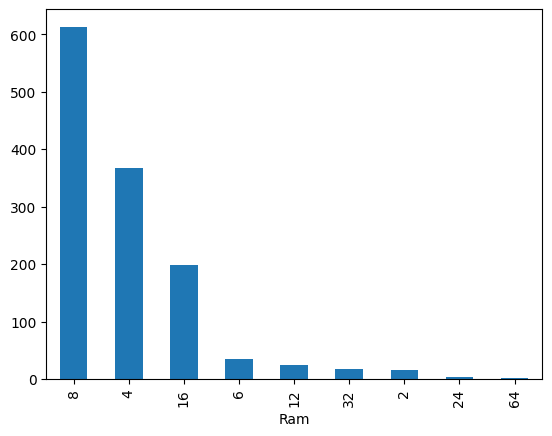

In [34]:
df['Ram'].value_counts().plot(kind='bar')

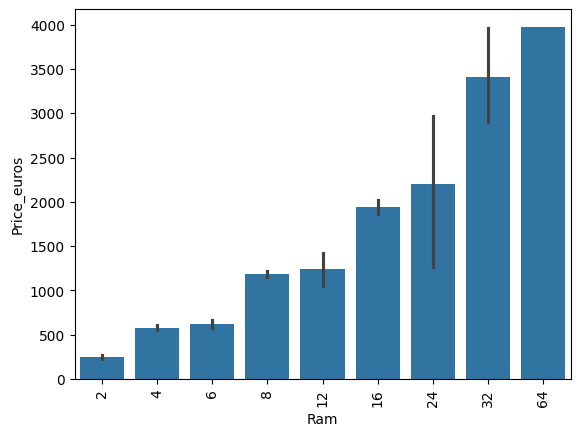

In [35]:
sns.barplot(x=df['Ram'],y=df['Price_euros'])
plt.xticks(rotation = 'vertical')
plt.show()

In [36]:
df.corr(numeric_only=True)['Price_euros']

,Price_euros
Inches,0.066608
Ram,0.740287
Weight,0.211883
Price_euros,1.000000
PrimaryStorage,-0.124775
SecondaryStorage,0.291207
PPI,0.470032


In [37]:
df['GPU_company'].value_counts()

,count
GPU_company,
Intel,704
Nvidia,396
AMD,174
ARM,1


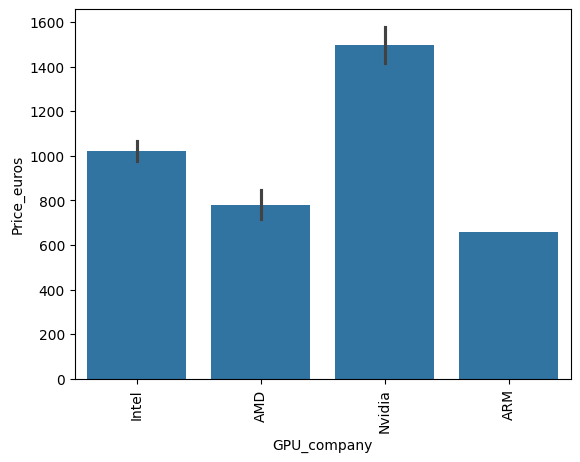

In [38]:
sns.barplot(x=df['GPU_company'],y=df['Price_euros'])
plt.xticks(rotation = 'vertical')
plt.show()

In [39]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,Touchscreen,IPSpanel,RetinaDisplay,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,PPI,CPU
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,No,Yes,Yes,128,0,SSD,No,Intel,Iris Plus Graphics 640,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,No,No,No,128,0,Flash Storage,No,Intel,HD Graphics 6000,127.677940,Intel Core i5
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,No,No,No,256,0,SSD,No,Intel,HD Graphics 620,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,No,Yes,Yes,512,0,SSD,No,AMD,Radeon Pro 455,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,No,Yes,Yes,256,0,SSD,No,Intel,Iris Plus Graphics 650,226.983005,Intel Core i5


In [40]:
df['OS'].value_counts()

,count
OS,
Windows 10,1048
No OS,66
Linux,58
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


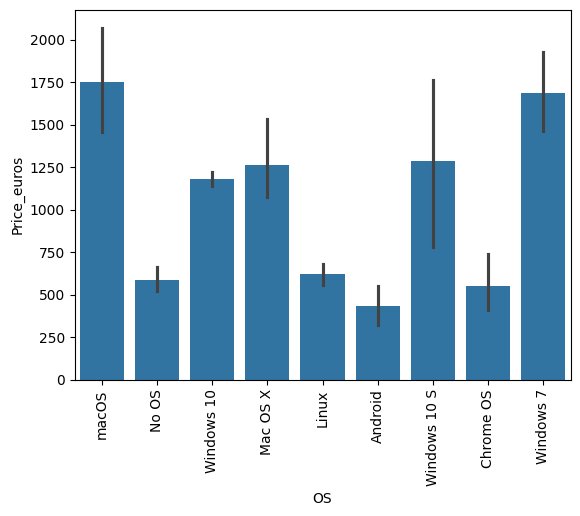

In [41]:
sns.barplot(x=df['OS'],y=df['Price_euros'])
plt.xticks(rotation = 'vertical')
plt.show()

In [42]:
def cat_os(inp):
  if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
    return 'Windows'
  elif inp == 'macOS' or inp == 'Mac OS X':
    return 'Mac'
  else :
    return 'Others'

In [43]:
df['os'] = df['OS'].apply(cat_os)
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,Touchscreen,...,RetinaDisplay,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,PPI,CPU,os
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,No,...,Yes,128,0,SSD,No,Intel,Iris Plus Graphics 640,226.983005,Intel Core i5,Mac
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,No,...,No,128,0,Flash Storage,No,Intel,HD Graphics 6000,127.677940,Intel Core i5,Mac
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,No,...,No,256,0,SSD,No,Intel,HD Graphics 620,141.211998,Intel Core i5,Others
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,No,...,Yes,512,0,SSD,No,AMD,Radeon Pro 455,220.534624,Intel Core i7,Mac
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,No,...,Yes,256,0,SSD,No,Intel,Iris Plus Graphics 650,226.983005,Intel Core i5,Mac


In [44]:
df.drop(columns=['OS'],inplace=True)
df.head(1)

,Company,Product,TypeName,Inches,Ram,Weight,Price_euros,Screen,Touchscreen,IPSpanel,RetinaDisplay,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,PPI,CPU,os
0,Apple,MacBook Pro,Ultrabook,13.3,8,1.37,1339.69,Standard,No,Yes,Yes,128,0,SSD,No,Intel,Iris Plus Graphics 640,226.983005,Intel Core i5,Mac


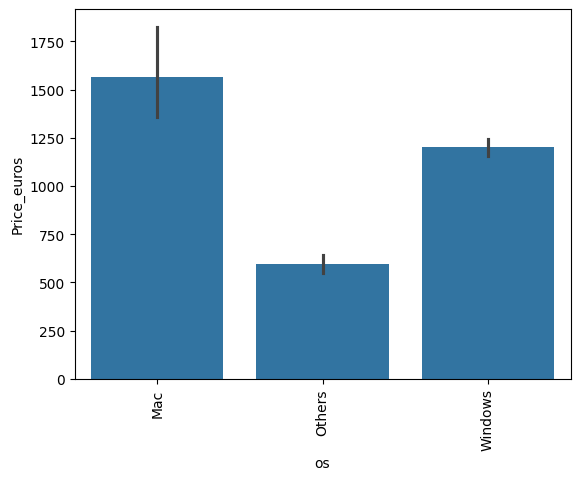

In [45]:
sns.barplot(x=df['os'],y=df['Price_euros'])
plt.xticks(rotation = 'vertical')
plt.show()

<ipython-input-46-1125578356>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

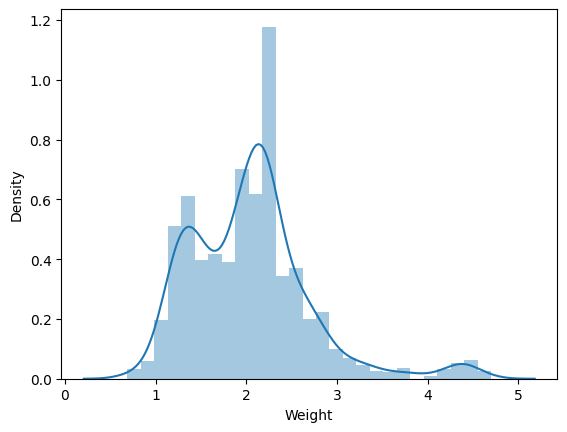

In [46]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price_euros'>

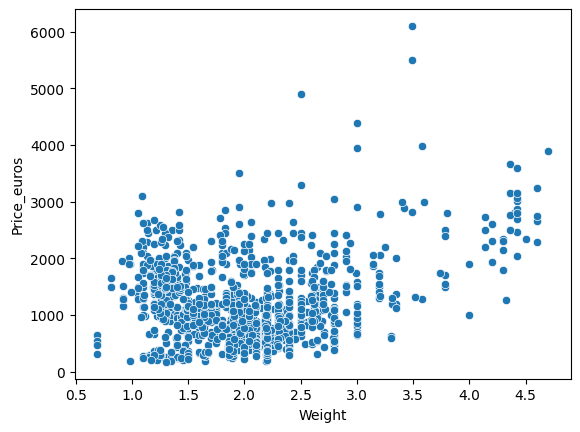

In [47]:
sns.scatterplot(x=df['Weight'],y=df['Price_euros'])

<Axes: >

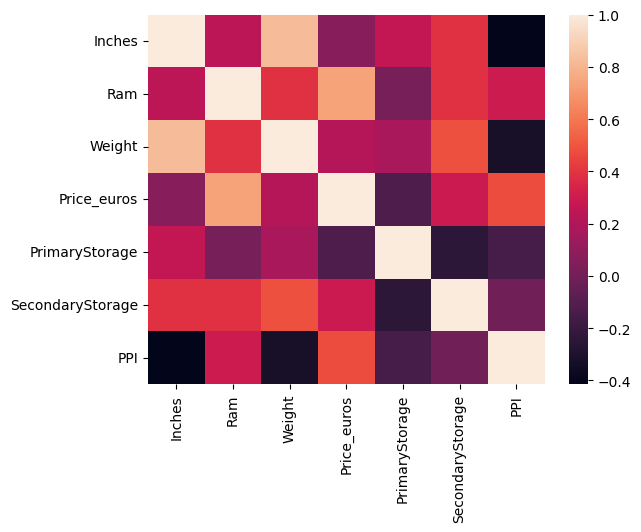

In [48]:
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True))

<ipython-input-49-1856128755>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price_euros'])
<ipython-input-49-1856128755>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price_euros']))


<Axes: xlabel='Price_euros', ylabel='Density'>

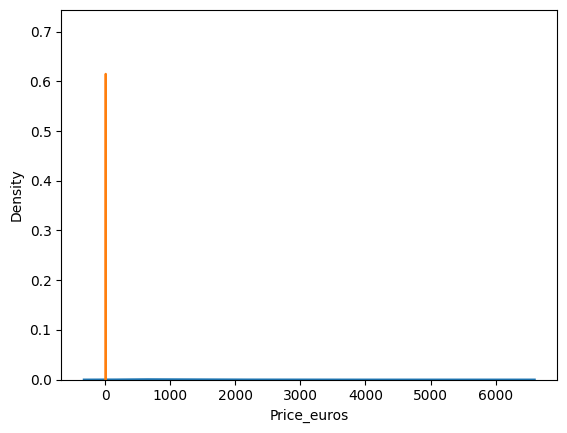

In [49]:
sns.distplot(df['Price_euros'])
sns.distplot(np.log(df['Price_euros']))

In [50]:
X= df.drop(columns=['Price_euros'])
y= np.log(df['Price_euros'])
X
y

,Price_euros
0,7.200194
1,6.801216
2,6.354370
3,7.838915
4,7.497540
...,...
1270,6.458338
1271,7.312553
1272,5.433722
1273,6.638568


In [51]:
df.head(1)
df.dtypes

,0
Company,object
Product,object
TypeName,object
Inches,float64
Ram,int32
Weight,float32
Price_euros,float64
Screen,object
Touchscreen,object
IPSpanel,object


# **Machine Learning**

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [53]:
X_train = X_train.drop(columns=['Product'])

In [54]:
X_train

,Company,TypeName,Inches,Ram,Weight,Screen,Touchscreen,IPSpanel,RetinaDisplay,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,PPI,CPU,os
944,Lenovo,2 in 1 Convertible,11.3,8,1.10,Full HD,Yes,Yes,No,256,0,SSD,No,Intel,HD Graphics 515,194.947537,Other Intel Processors,Windows
21,Lenovo,Gaming,15.6,8,2.50,Full HD,No,Yes,No,128,1024,SSD,HDD,Nvidia,GeForce GTX 1050,141.211998,Intel Core i5,Windows
530,Dell,Gaming,17.3,16,4.42,Full HD,No,Yes,No,128,1024,SSD,HDD,Nvidia,GeForce GTX 1070,127.335675,Intel Core i7,Windows
279,Lenovo,Notebook,17.3,8,2.80,Full HD,No,No,No,2048,0,HDD,No,Nvidia,GeForce MX150,127.335675,Intel Core i7,Others
398,Dell,Workstation,15.6,8,1.78,4K Ultra HD,Yes,No,No,256,0,SSD,No,Nvidia,Quadro M1200,282.423996,Intel Core i7,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,15.6,4,2.20,Standard,No,No,No,500,0,HDD,No,Nvidia,GeForce GTX 940MX,100.454670,Intel Core i3,Windows
299,Asus,Ultrabook,15.6,16,1.63,Full HD,No,No,No,512,0,SSD,No,Nvidia,GeForce 940MX,141.211998,Intel Core i7,Windows
493,Acer,Notebook,15.6,8,2.20,Standard,No,No,No,1024,0,HDD,No,AMD,Radeon RX 540,100.454670,Return Processor,Windows
527,Lenovo,Notebook,15.6,8,2.20,Standard,No,No,No,2048,0,HDD,No,Nvidia,GeForce 920MX,100.454670,Intel Core i3,Others


# **Testing Techniques**

In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import Ridge

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [57]:
df.head(1)

,Company,Product,TypeName,Inches,Ram,Weight,Price_euros,Screen,Touchscreen,IPSpanel,RetinaDisplay,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,PPI,CPU,os
0,Apple,MacBook Pro,Ultrabook,13.3,8,1.37,1339.69,Standard,No,Yes,Yes,128,0,SSD,No,Intel,Iris Plus Graphics 640,226.983005,Intel Core i5,Mac


In [58]:
print(X_train.columns)

Index(['Company', 'TypeName', 'Inches', 'Ram', 'Weight', 'Screen',
       'Touchscreen', 'IPSpanel', 'RetinaDisplay', 'PrimaryStorage',
       'SecondaryStorage', 'PrimaryStorageType', 'SecondaryStorageType',
       'GPU_company', 'GPU_model', 'PPI', 'CPU', 'os'],
      dtype='object')


 **Linear Regression**

In [59]:
step1 = ColumnTransformer(transformers=[                                                          ##
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',drop='first'),[0, 1, 5, 6, 7, 8, 11, 12, 13, 14, 16, 17])      ##  if needed (sparse=False,drop='first')
],remainder='passthrough')

step2= LinearRegression()

pipe = Pipeline([
    ('step1', step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8468948892098582
MAE 0.19027760260137386


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


 **Decision Tree Regressor**

In [60]:
step1 = ColumnTransformer(transformers=[                                                          ##
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',drop='first'),[0, 1, 5, 6, 7, 8, 11, 12, 13, 14, 16, 17])      ##  if needed (sparse=False,drop='first')
],remainder='passthrough')

step2= DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1', step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8309203592887995
MAE 0.18834052066258647


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


 **SVM**

In [61]:
step1 = ColumnTransformer(transformers=[                                                          ##
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',drop='first'),[0, 1, 5, 6, 7, 8, 11, 12, 13, 14, 16, 17])      ##  if needed (sparse=False,drop='first')
],remainder='passthrough')

step2= SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1', step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8493556317862634
MAE 0.1890517038738964


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


 **Random Forest Regressor**

In [62]:
step1 = ColumnTransformer(transformers=[                                                          ##
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',drop='first'),[0, 1, 5, 6, 7, 8, 11, 12, 13, 14, 16, 17])      ##  if needed (sparse=False,drop='first')
],remainder='passthrough')

step2= RandomForestRegressor(n_estimators=100,
                             random_state=3,
                             max_samples=0.5,
                             max_features=0.75,
                             max_depth=15)

pipe = Pipeline([
    ('step1', step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8867134940097233
MAE 0.1598233790537227


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# **Ensemble Techniques**
**Voting Regressor**

In [63]:
from sklearn.ensemble import VotingRegressor

In [64]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',drop='first'),[0, 1, 5, 6, 7, 8, 11, 12, 13, 14, 16, 17])
],remainder='passthrough')

lr = LinearRegression()
Dtr = DecisionTreeRegressor(max_depth=8)
Svm = SVR(kernel='rbf',C=10000,epsilon=0.1)
rf = RandomForestRegressor(n_estimators=100,
                             random_state=3,
                             max_samples=0.5,
                             max_features=0.75,
                             max_depth=15)

step2 = VotingRegressor([('lr',lr),
                        ('Dtr',Dtr),
                        ('Svm',Svm),
                        ('rf',rf)],
                        weights=[5,1,1,1])

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8773284835584776
MAE 0.17020300497098403


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


**Stacking Regressor**

In [65]:
from sklearn.ensemble import StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',drop='first'),[0, 1, 5, 6, 7, 8, 11, 12, 13, 14, 16, 17])
],remainder='passthrough')

estimators = [
('lr',LinearRegression()),
('Dtr', DecisionTreeRegressor(max_depth=8)),
('Svm', SVR(kernel='rbf',C=10000,epsilon=0.1)),
('rf', RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15))
]

step2 = StackingRegressor(estimators=estimators,final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8845708180802602
MAE 0.16530623246839002


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# **Exporting**

In [66]:
import pickle
# pickle.dump(df,open('df.pkl','wb'))                                     ## write binary
# pickle.dump(pipe,open('pipe.pkl','wb'))

# Save the DataFrame for use in Streamlit
with open('df.pkl', 'wb') as f:
    pickle.dump(X_train, f)

# Save the pipeline separately
with open('pipe.pkl', 'wb') as f:
    pickle.dump(pipe, f)


In [67]:
X_train.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'Weight', 'Screen',
       'Touchscreen', 'IPSpanel', 'RetinaDisplay', 'PrimaryStorage',
       'SecondaryStorage', 'PrimaryStorageType', 'SecondaryStorageType',
       'GPU_company', 'GPU_model', 'PPI', 'CPU', 'os'],
      dtype='object')

# **Python Website Code**

In [68]:
import streamlit as st
import pickle
import numpy as np

# Load model and data
pipe = pickle.load(open('pipe.pkl', 'rb'))
df = pickle.load(open('df.pkl', 'rb'))

st.title("Laptop Price Predictor")

# UI Elements
Company = st.selectbox('Company', df['Company'].unique())
type = st.selectbox('Type', df['TypeName'].unique())
Inches = st.selectbox('Screen Size (inches)', [13,14,15,17])
Ram = st.selectbox('Ram (in GB)', [2, 4, 6, 8, 12, 16, 24, 32, 64, 128])
Weight = st.selectbox('Weight (kg)',  [1,2,3])
Screen = st.selectbox('Screen Size', df['Screen'].unique())
Touchscreen = st.selectbox('Touchscreen', ['Yes', 'No'])
IPS_panel = st.selectbox('IPS Panel', ['Yes', 'No'])
Retina_Display = st.selectbox('Retina Display', ['Yes', 'No'])

# Ensure screen size is float


CPU = st.selectbox('CPU', df['CPU'].unique())

Primary_Storage_Type = st.selectbox('Primary Storage Type', ['HDD', 'SSD', 'No'])
Primary_Storage = st.selectbox('Primary Storage (GB)', [0, 128, 256, 512, 1024, 2048])

Secondary_Storage_Type = st.selectbox('Secondary Storage Type', ['HDD', 'SSD', 'No'])
Secondary_Storage = st.selectbox('Secondary Storage (GB)', [0, 128, 256, 512, 1024, 2048])

GPU = st.selectbox('GPU Brand', df['GPU_company'].unique())
GPU_model = st.selectbox('GPU Model', df['GPU_model'].unique())

Resolution = st.selectbox('Resolution', ['1920x1080', '1366x768', '1600x900', '3848x2160',
    '3200x1800', '2880x1800', '2560x1600', '2560x1440', '2304x1440'])

OS = st.selectbox('Operating System', df['os'].unique())

if st.button('Predict Price', key='predict_button'):
        try:
            # PPI calculation
            X_res = int(Resolution.split('x')[0])
            Y_res = int(Resolution.split('x')[1])
            ppi = ((X_res ** 2 + Y_res ** 2) ** 0.5) / Inches

            # Type conversions
            Ram = int(Ram)
            Weight = float(Weight)
            Primary_Storage = int(Primary_Storage)
            Secondary_Storage = int(Secondary_Storage)

            # Final query
            query = np.array([
                Company, type, Inches, Ram, Weight,
                Screen, Touchscreen, IPS_panel, Retina_Display,
                Primary_Storage, Secondary_Storage,
                Primary_Storage_Type, Secondary_Storage_Type,
                GPU, GPU_model, ppi, CPU, OS
            ], dtype=object).reshape(1, -1)

            st.write("Query Preview:", query)

            # Predict
            prediction = pipe.predict(query)[0]
            st.success(f"Predicted Laptop Price: ₹ {round(prediction)}")

        except Exception as e:
            st.error(f"Prediction error: {e}")


2025-06-17 05:30:50.635 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 05:30:50.816 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-17 05:30:50.817 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 05:30:50.819 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 05:30:50.820 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 05:30:50.823 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 05:30:50.824 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 05:30:50.825 Session state does not 